<a href="https://colab.research.google.com/github/AlanCarro/PREENTREGA_DEL_PROYECTO_FINAL-Alan_Emanuel_Carro/blob/main/Preentrega_proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

from datetime import datetime
from numpy import nan
from numpy import isnan

APPLE = yf.download('AAPL')
GOOGLE = yf.download('GOOGL')
MICROSOFT = yf.download('MSFT')
AMAZON = yf.download('AMZN')
NVIDIA = yf.download('NVDA')
AMD = yf.download('AMD')
INTEL = yf.download('INTC')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
df= pd.concat([APPLE, GOOGLE, MICROSOFT, AMAZON, NVIDIA, AMD, INTEL], axis=1)
eliminar_columnas = ['Adj Close']
df = df.drop(eliminar_columnas, axis=1)
df.fillna(0, inplace=True)

empresas = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'NVIDIA', 'AMD', 'INTEL']
if 'Open APPLE' not in df.columns:
  nuevas_columnas = []
  for i in range(len(df.columns)):
    empresa = empresas[i // 5]
    columna = df.columns[i]
    nuevas_columnas.append(f'{columna} {empresa}')

df.columns = nuevas_columnas
df.columns

Index(['Open APPLE', 'High APPLE', 'Low APPLE', 'Close APPLE', 'Volume APPLE',
       'Open GOOGLE', 'High GOOGLE', 'Low GOOGLE', 'Close GOOGLE',
       'Volume GOOGLE', 'Open MICROSOFT', 'High MICROSOFT', 'Low MICROSOFT',
       'Close MICROSOFT', 'Volume MICROSOFT', 'Open AMAZON', 'High AMAZON',
       'Low AMAZON', 'Close AMAZON', 'Volume AMAZON', 'Open NVIDIA',
       'High NVIDIA', 'Low NVIDIA', 'Close NVIDIA', 'Volume NVIDIA',
       'Open AMD', 'High AMD', 'Low AMD', 'Close AMD', 'Volume AMD',
       'Open INTEL', 'High INTEL', 'Low INTEL', 'Close INTEL', 'Volume INTEL'],
      dtype='object')

In [ ]:
for accion in empresas:
    columna_apertura = 'Open ' + accion
    columna_cierre = 'Close ' + accion
    columna_resta = (df[columna_apertura] - df[columna_cierre]) / df[columna_apertura]
    insert_position = (empresas.index(accion) + 1) * 5
    df.insert(insert_position,'Varianza ' + accion, columna_resta)

In [ ]:
df

,Open APPLE,High APPLE,Low APPLE,Close APPLE,Volume APPLE,Varianza APPLE,Open GOOGLE,High GOOGLE,Low GOOGLE,Close GOOGLE,...,High AMD,Low AMD,Close AMD,Varianza INTEL,Volume AMD,Open INTEL,High INTEL,Low INTEL,Close INTEL,Volume INTEL
Date,,,,,,,,,,,,,,,,,,,,,
1980-03-17,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,...,3.302083,3.125000,3.145833,0.000000,219600,0.325521,0.330729,0.325521,0.325521,10924800
1980-03-18,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,...,3.125000,2.937500,3.031250,0.007999,727200,0.325521,0.328125,0.322917,0.322917,17068800
1980-03-19,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,...,3.083333,3.020833,3.041667,0.000000,295200,0.330729,0.335938,0.330729,0.330729,18508800
1980-03-20,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,...,3.062500,3.010417,3.010417,0.003937,159600,0.330729,0.334635,0.329427,0.329427,11174400
1980-03-21,0.000000,0.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,...,3.020833,2.906250,2.916667,0.016131,130800,0.322917,0.322917,0.317708,0.317708,12172800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-05,195.399994,196.899994,194.869995,195.869995,54156800.0,-0.002405,175.199997,176.649994,173.929993,175.410004,...,167.119995,161.380005,166.169998,-0.016848,60507500,30.270000,30.840000,30.010000,30.780001,44161700
2024-06-06,195.690002,196.500000,194.169998,194.479996,41181800.0,0.006183,175.899994,177.149994,175.750000,176.729996,...,169.509995,163.860001,166.779999,0.004255,47153700,30.549999,30.590000,30.160000,30.420000,34248100
2024-06-07,194.649994,196.940002,194.139999,196.889999,53103900.0,-0.011508,177.050003,177.869995,174.300003,174.460007,...,169.449997,165.860001,167.869995,-0.016198,44796000,30.250000,30.780001,30.209999,30.740000,34085500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11153 entries, 1980-03-17 to 2024-06-11
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open APPLE          11153 non-null  float64
 1   High APPLE          11153 non-null  float64
 2   Low APPLE           11153 non-null  float64
 3   Close APPLE         11153 non-null  float64
 4   Volume APPLE        11153 non-null  float64
 5   Varianza APPLE      10965 non-null  float64
 6   Open GOOGLE         11153 non-null  float64
 7   High GOOGLE         11153 non-null  float64
 8   Low GOOGLE          11153 non-null  float64
 9   Close GOOGLE        11153 non-null  float64
 10  Varianza GOOGLE     4987 non-null   float64
 11  Volume GOOGLE       11153 non-null  float64
 12  Open MICROSOFT      11153 non-null  float64
 13  High MICROSOFT      11153 non-null  float64
 14  Low MICROSOFT       11153 non-null  float64
 15  Varianza MICROSOFT  9639 non-null   

In [ ]:
columnas_seleccionadas = df.loc['2024-06-07', ['Open APPLE', 'Open GOOGLE', 'Open MICROSOFT', 'Open AMAZON', 'Open NVIDIA', 'Open AMD', 'Open INTEL']]
columnas_seleccionadas

Open APPLE        194.649994
Open GOOGLE       177.050003
Open MICROSOFT    426.200012
Open AMAZON       184.899994
Open NVIDIA       119.769997
Open AMD          166.589996
Open INTEL         30.250000
Name: 2024-06-07 00:00:00, dtype: float64

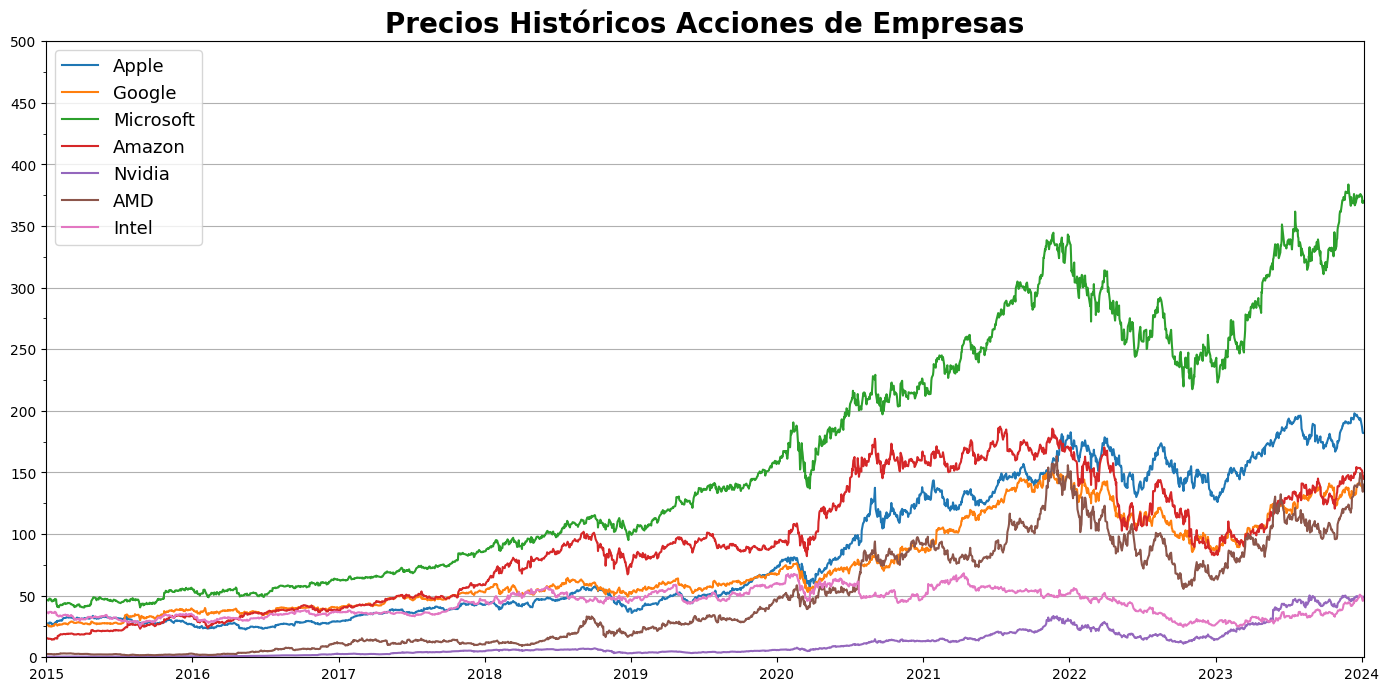

In [ ]:
fig, ax = plt.subplots(figsize = (17, 8))


ax.set_title('Precios Históricos Acciones de Empresas', fontsize=20, weight='bold')
ax.plot(df.index, df['Open APPLE'], label= 'Apple')
ax.plot(df.index, df['Open GOOGLE'], label= 'Google')
ax.plot(df.index, df['Open MICROSOFT'], label= 'Microsoft')
ax.plot(df.index, df['Open AMAZON'], label= 'Amazon')
ax.plot(df.index, df['Open NVIDIA'], label= 'Nvidia')
ax.plot(df.index, df['Open AMD'], label= 'AMD')
ax.plot(df.index, df['Open INTEL'], label= 'Intel')
ax.legend(loc='upper left', fontsize=13)
ax.set_xlim(pd.to_datetime('1/1/2015'), pd.to_datetime('1/6/2024'))
plt.ylim(bottom=0, top=500)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_major_locator(mdates.YearLocator(1))

ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(25))

ax.grid(axis='y')

Text(0, 0.5, 'INTEL')

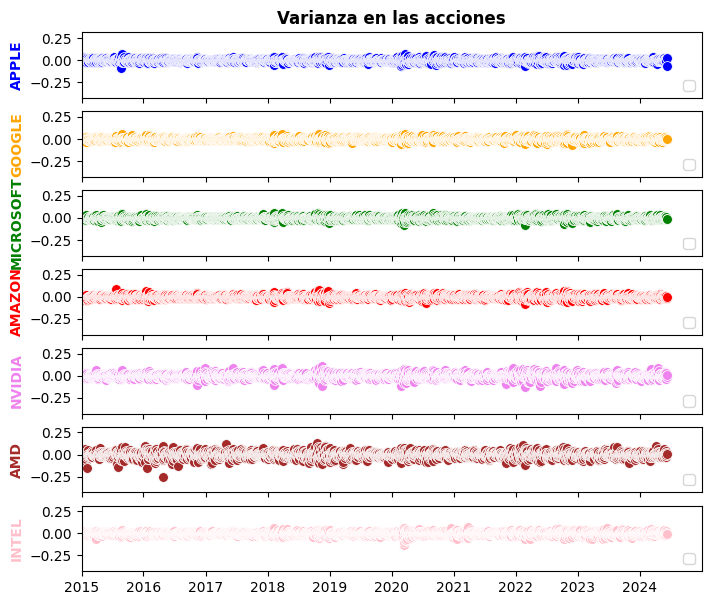

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(8, 7), sharex=True, sharey=True)

sns.scatterplot(data=df, x= df.index, y=df['Varianza APPLE'],ax=ax[0], color='blue', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza GOOGLE'],ax=ax[1], color='orange', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza MICROSOFT'],ax=ax[2], color='green', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza AMAZON'],ax=ax[3], color='red', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza NVIDIA'],ax=ax[4], color='violet', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza AMD'],ax=ax[5], color='brown', s=50)
sns.scatterplot(data=df, x= df.index, y=df['Varianza INTEL'],ax=ax[6], color='pink', s=50)

for a in ax:
    a.set_xlim(pd.to_datetime('01/01/2015'), pd.to_datetime('12/31/2024'))
    a.legend(loc='lower right', fontsize=10)
    a.set_ylabel('')
    a.set_xlabel('')

ax[0].set_title('Varianza en las acciones', weight='bold')
ax[3].set_xlabel('Año')
ax[0].set_ylabel('APPLE',color='blue',weight='bold')
ax[1].set_ylabel('GOOGLE',color='orange',weight='bold')
ax[2].set_ylabel('MICROSOFT',color='green',weight='bold')
ax[3].set_ylabel('AMAZON',color='red',weight='bold')
ax[4].set_ylabel('NVIDIA',color='violet',weight='bold')
ax[5].set_ylabel('AMD',color='brown',weight='bold')
ax[6].set_ylabel('INTEL',color='pink',weight='bold')

Text(0.5, 1.0, 'Volumen diario Acciones')

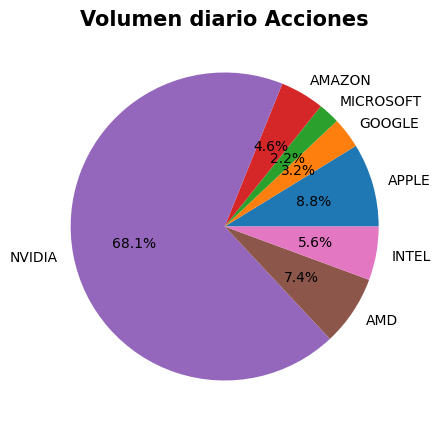

In [ ]:
columnas_seleccionadas = df.loc['2024-06-07', ['Volume APPLE', 'Volume GOOGLE', 'Volume MICROSOFT', 'Volume AMAZON', 'Volume NVIDIA', 'Volume AMD', 'Volume INTEL']]

fig,ax = plt.subplots(figsize =(5, 5))

vol_indices = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'NVIDIA', 'AMD', 'INTEL']
ax.pie(columnas_seleccionadas, labels = vol_indices,autopct='%1.1f%%')

plt.title('Volumen diario Acciones', fontsize=15, weight='bold', loc = 'center')

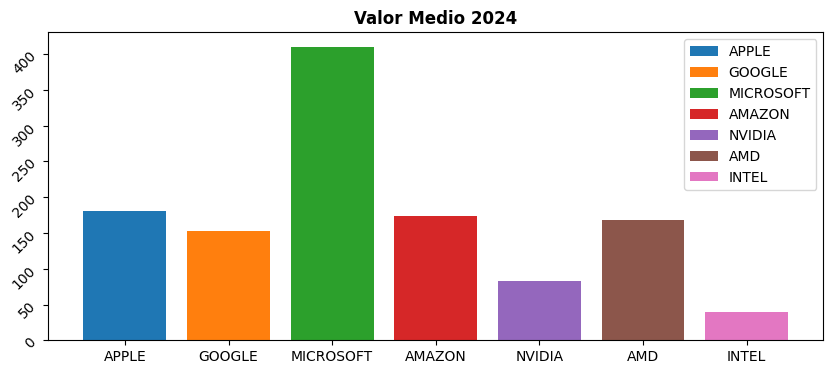

In [ ]:
plt.figure(figsize=(10, 4))
df_rango = df.loc['2024-01-01':'2024-12-31']

media1 = df_rango['Open APPLE'].mean()
media2 = df_rango['Open GOOGLE'].mean()
media3 = df_rango['Open MICROSOFT'].mean()
media4 = df_rango['Open AMAZON'].mean()
media5 = df_rango['Open NVIDIA'].mean()
media6 = df_rango['Open AMD'].mean()
media7 = df_rango['Open INTEL'].mean()

medias = [media1 ,media2 ,media3 ,media4 ,media5 ,media6 ,media7]
column = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON', 'NVIDIA', 'AMD', 'INTEL']

for i in range(len(column)):
    plt.bar(column[i],
            medias[i],
            label=column[i])

plt.title('Valor Medio 2024',weight='bold')

plt.yticks(rotation=45)
plt.legend()

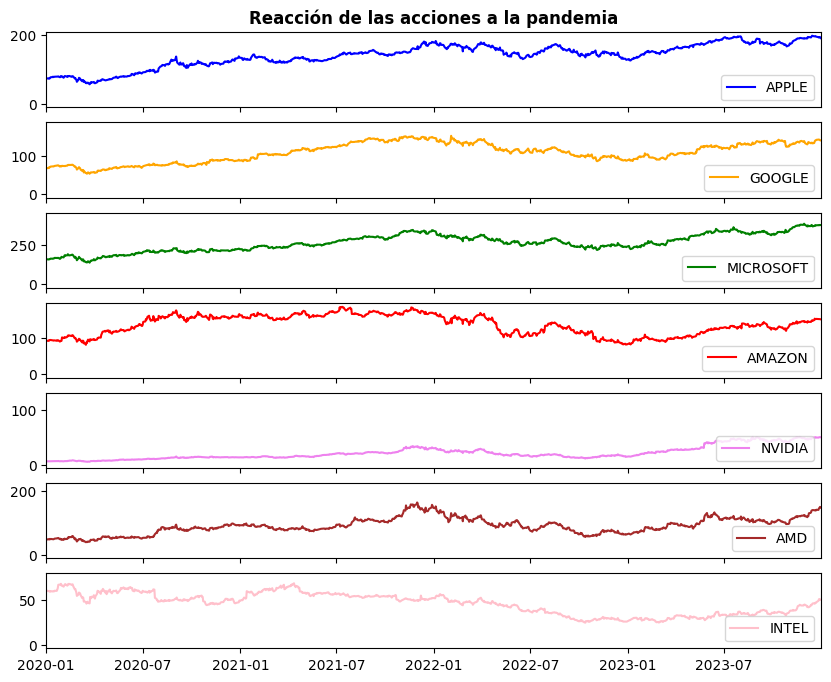

In [ ]:
fig, ax = plt.subplots(nrows=7, ncols=1, figsize=(10, 8), sharex=True)

sns.lineplot(x=df.index, y=df['Open APPLE'], color='blue',label='APPLE', ax=ax[0])
sns.lineplot(x=df.index, y=df['Open GOOGLE'], color='orange',label='GOOGLE', ax=ax[1])
sns.lineplot(x=df.index, y=df['Open MICROSOFT'], color='green',label='MICROSOFT', ax=ax[2])
sns.lineplot(x=df.index, y=df['Open AMAZON'], color='red',label='AMAZON', ax=ax[3])
sns.lineplot(x=df.index, y=df['Open NVIDIA'], color='violet',label='NVIDIA', ax=ax[4])
sns.lineplot(x=df.index, y=df['Open AMD'], color='brown',label='AMD', ax=ax[5])
sns.lineplot(x=df.index, y=df['Open INTEL'], color='pink',label='INTEL', ax=ax[6])

ax[0].set_title('Reacción de las acciones a la pandemia',weight='bold')

for a in ax:
    a.set_xlim(pd.to_datetime('01/01/2020'), pd.to_datetime('12/31/2023'))
    a.legend(loc='lower right', fontsize=10)
    a.set_ylabel('')
    a.set_xlabel('')